# Task 3 (Sales Prediction Using Python)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Advertising.csv')

In [40]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [42]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [43]:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

## Data Preprocessing

Remove Unnamed:0 column because it will give no information. It is just a index number of the rows (data record).

In [44]:
df = df.drop('Unnamed: 0',axis=1)

In [45]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratory Data Analysis (EDA)

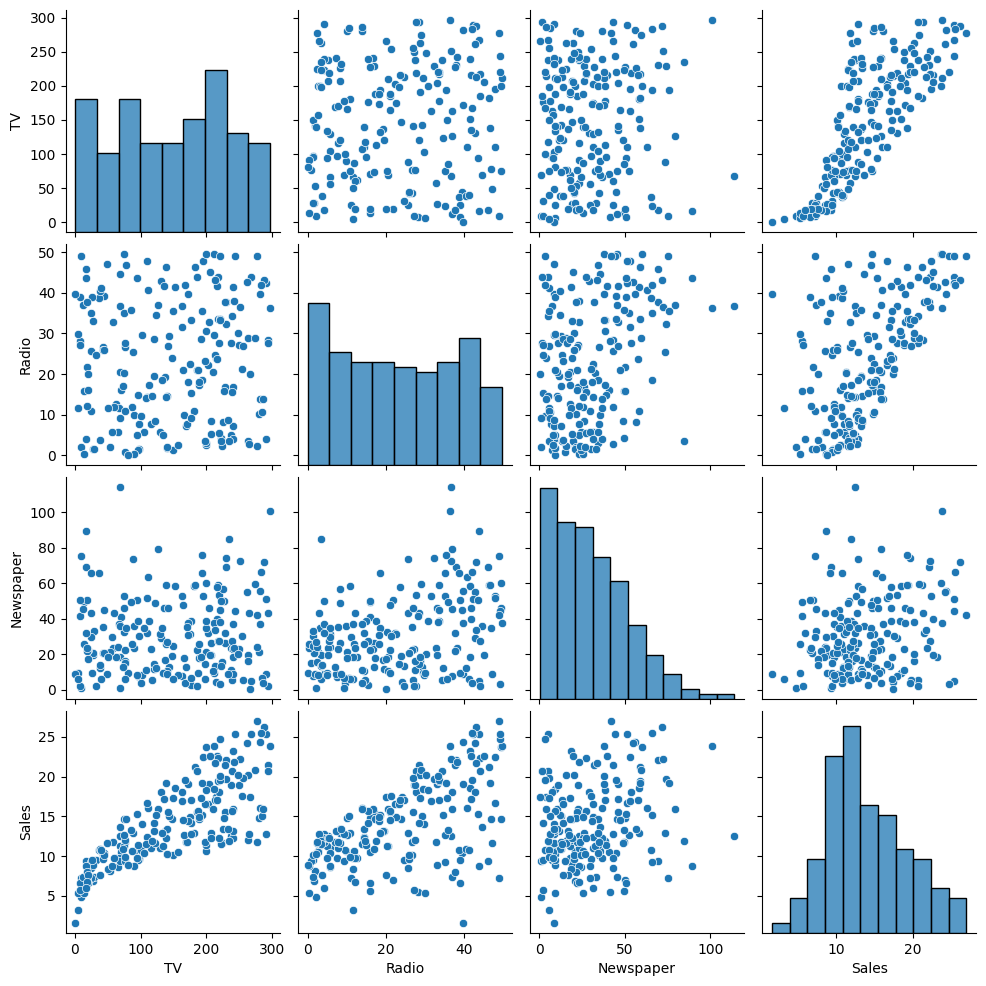

In [46]:
sns.pairplot(df)

### Univariate Analysis

Text(0.5, 0.98, 'Feature Distribution')

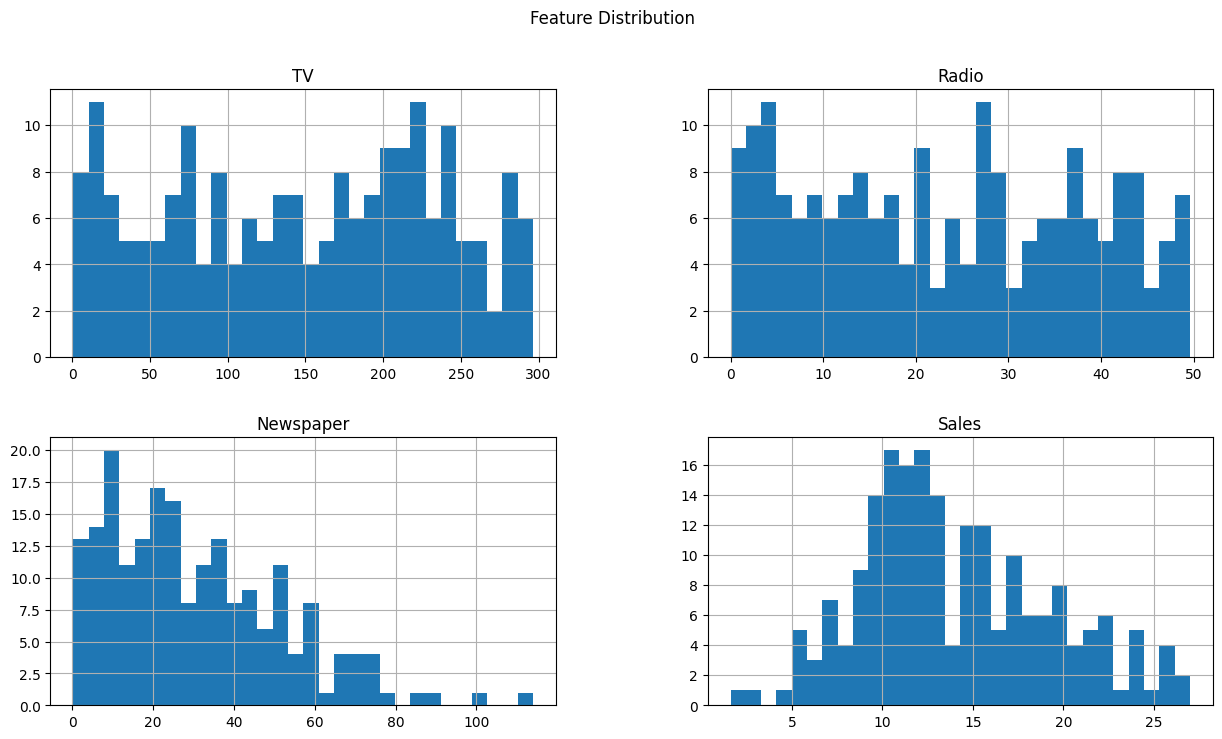

In [47]:
df.hist(bins=30,figsize=(15,8))
plt.suptitle('Feature Distribution')

Text(0.5, 0.98, 'BoxPlot')

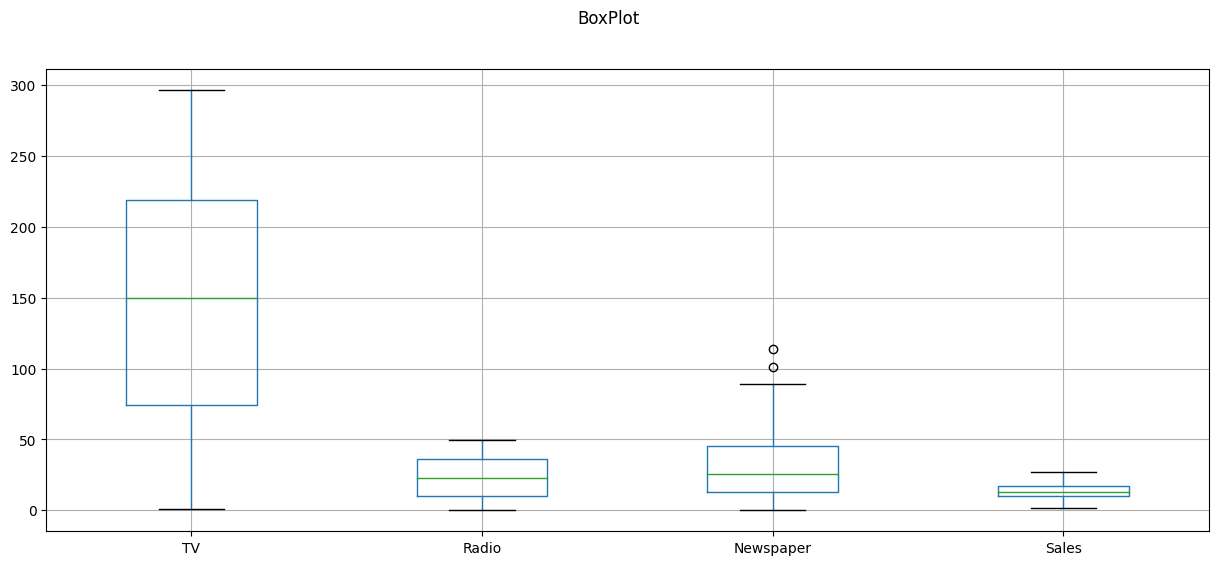

In [48]:
df.boxplot(figsize=(15,6))
plt.suptitle('BoxPlot')

Text(0.5, 1.0, 'TV Feature Distribution')

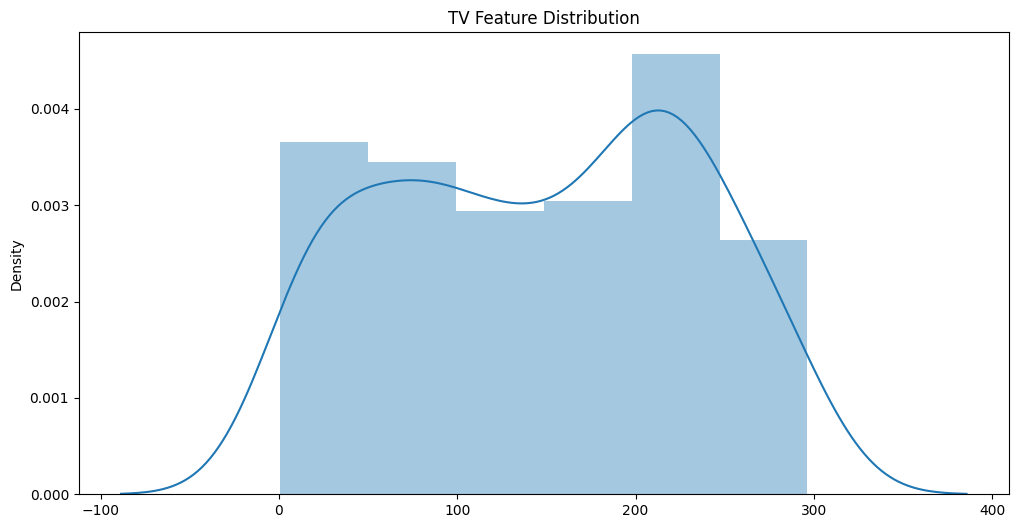

In [49]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['TV'],kde=True)
plt.title('TV Feature Distribution')

Text(0.5, 1.0, 'Radio Feature Distribution')

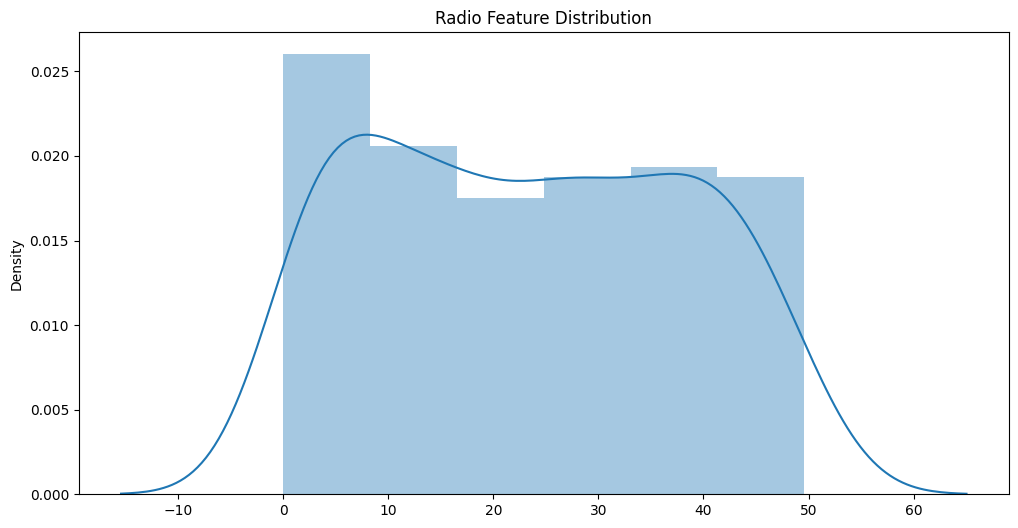

In [50]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Radio'],kde=True)
plt.title('Radio Feature Distribution')

Text(0.5, 1.0, 'Newspaper Feature Distribution')

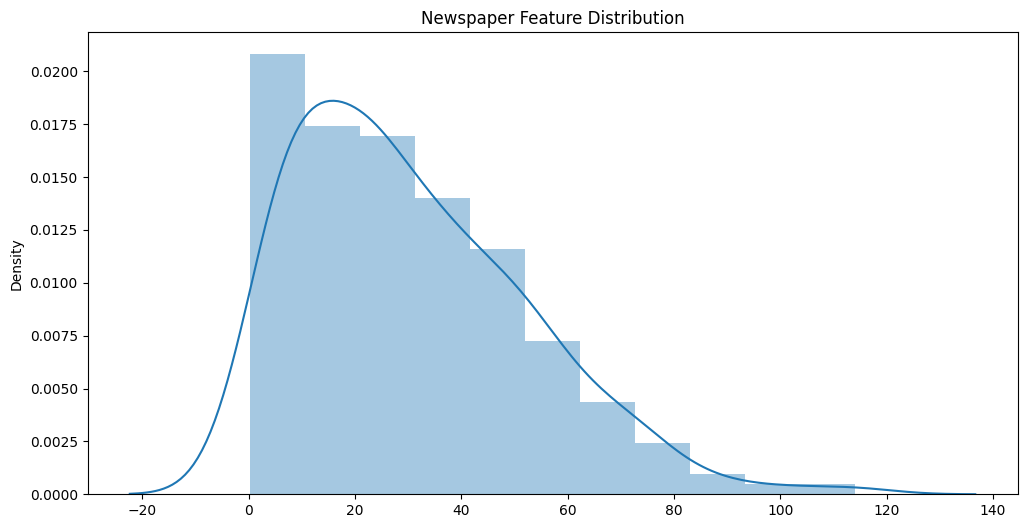

In [51]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Newspaper'],kde=True)
plt.title('Newspaper Feature Distribution')

Text(0.5, 1.0, 'Sales Feature Distribution (Target Variable)')

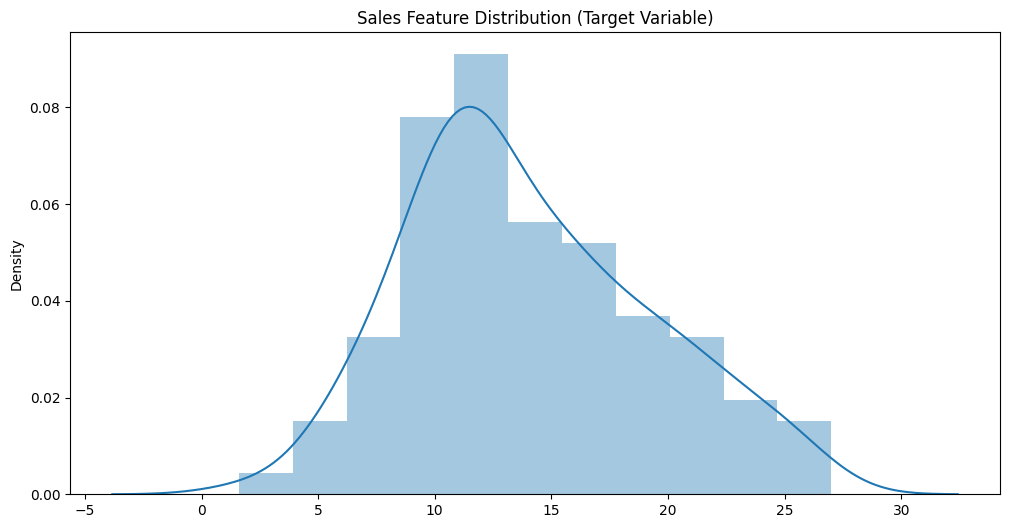

In [52]:
plt.figure(figsize=(12,6))
sns.distplot(x=df['Sales'],kde=True)
plt.title('Sales Feature Distribution (Target Variable)')

### Heatmap

Text(0.5, 1.0, 'Heatmap of DataFrame')

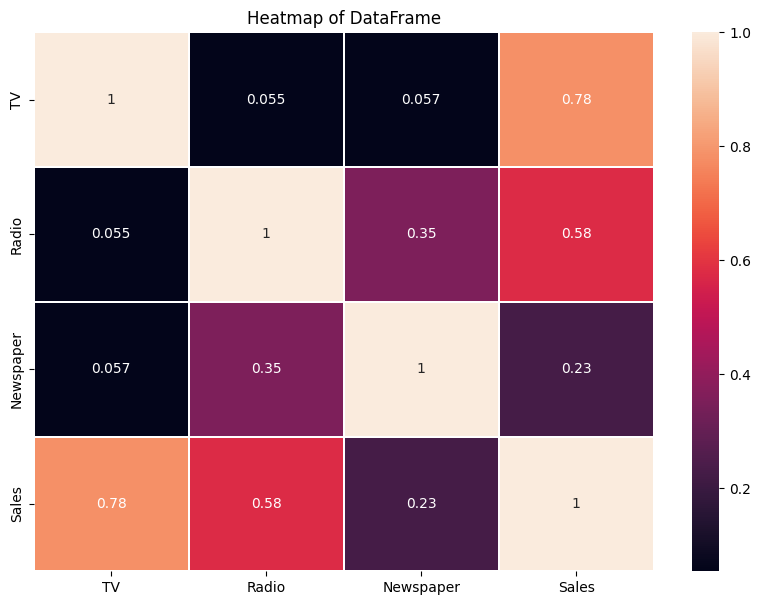

In [53]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True,linecolor='white',linewidths=0.2)
plt.title('Heatmap of DataFrame')

Text(0.5, 1.0, 'Correlation Plot of All Features')

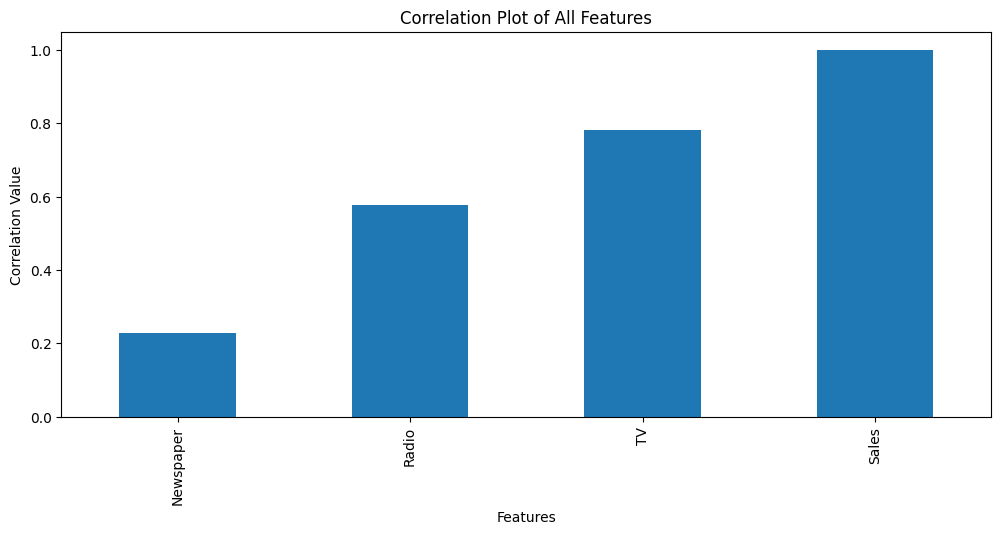

In [54]:
plt.figure(figsize=(12,5))
df.corr()['Sales'].sort_values().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correlation Plot of All Features')

## Machine Learning Part

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Splitting of Data

In [56]:
X = df.drop('Sales',axis=1)
y = df['Sales']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Algorithms

In [58]:
lr = LinearRegression()
dtree = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [59]:
models_name = ['Linear Reg.', 'Decision Tree', 'Random Forest']
models_obj = [lr, dtree, rfr]

### Evaluating best Model for our Problem using MSE

In [60]:
for i,j in zip(models_name,models_obj):
  j.fit(X_train,y_train)
  pred = j.predict(X_test)
  print(f'MSE for {i}: {mean_squared_error(y_test,pred):.2f}')

MSE for Linear Reg.: 3.80
MSE for Decision Tree: 1.45
MSE for Random Forest: 0.46


So, Random Forest gives us minimum MSE. Hence, we will proceed further with Random Forest.

### Random Forest Model

In [61]:
rfr.fit(X_train,y_train)
rfr_pred = rfr.predict(X_test)

Creating a DataFrame which indicate the difference between Actual Sales (Y Test) and Prediction Sales (Y Pred).

In [64]:
differ = pd.DataFrame({'Actual Sales':y_test,'Prediction Sales':rfr_pred,'Difference':(y_test - rfr_pred)})
differ.head(10)

,Actual Sales,Prediction Sales,Difference
95,16.9,17.622,-0.722
15,22.4,21.650,0.750
30,21.4,20.565,0.835
158,7.3,6.049,1.251
128,24.7,23.309,1.391
115,12.6,13.087,-0.487
69,22.3,22.838,-0.538
170,8.4,9.698,-1.298
174,11.5,12.211,-0.711
45,14.9,16.106,-1.206


Text(0, 0.5, 'Y Pred (Predicted Value)')

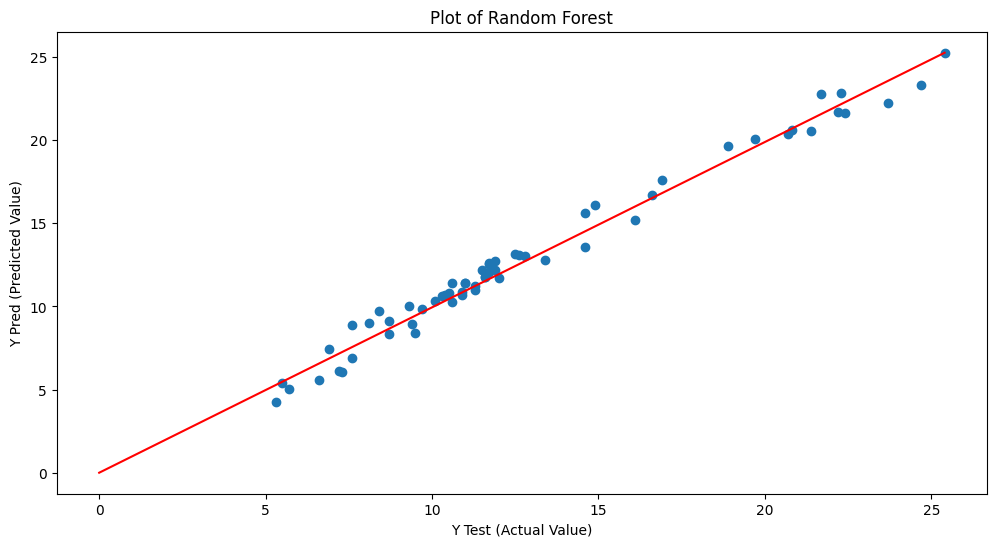

In [65]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,rfr_pred)
plt.plot([0,max(y_test)],[0,max(rfr_pred)],color='r')
plt.title('Plot of Random Forest')
plt.xlabel('Y Test (Actual Value)')
plt.ylabel('Y Pred (Predicted Value)')

Text(0.5, 1.0, 'Distribution of Difference between Actual and Predicted')

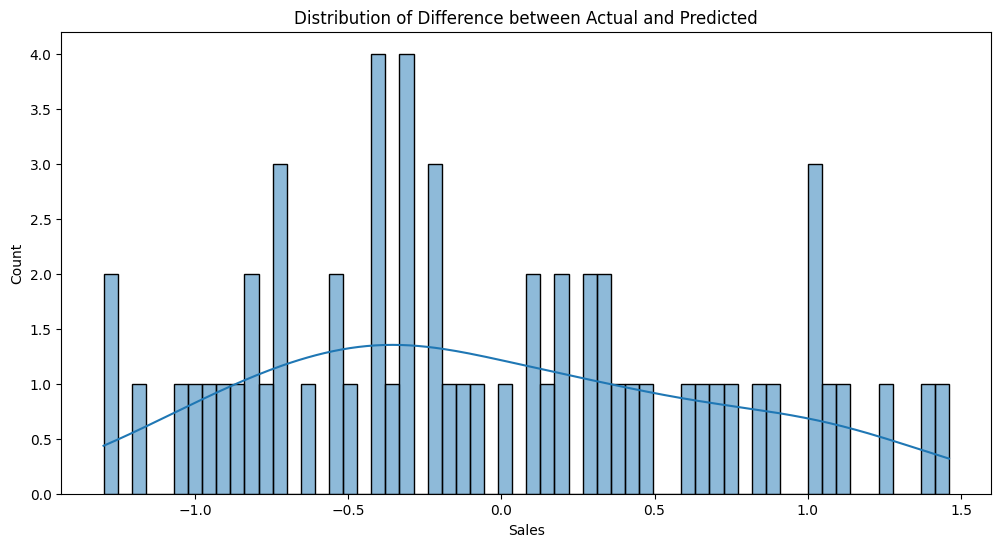

In [66]:
plt.figure(figsize=(12,6))
sns.histplot((y_test - rfr_pred),bins=60,kde=True)
plt.title('Distribution of Difference between Actual and Predicted')

### Model Evaluation

In [67]:
print(f'MSE of Model: {mean_squared_error(y_test,rfr_pred):.2f}')
print(f'MAE of Model: {mean_absolute_error(y_test,rfr_pred):.2f}')
print(f'RMSE of Model: {np.sqrt(mean_squared_error(y_test,rfr_pred)):.2f}')
print('\nVariance Score: ',r2_score(y_test,rfr_pred))

MSE of Model: 0.52
MAE of Model: 0.61
RMSE of Model: 0.72

Variance Score:  0.9811308768696859


In [68]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficent'])
coeff_df

,Coefficent
TV,0.044059
Radio,0.199287
Newspaper,0.006882


### Model Prediction (On New Data)

In [69]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [71]:
rfr.predict([[160.1,27.8,49.2]])

array([16.602])

According to model, if:

1. TV = 160.1
2. Radio = 27.8
3. Newspaper = 49.2

Then our Sales is 16.602.